# Data Wrangling and Exploratory Data Analysis
* ## 1.1 Importing Data
* ## 1.2 Merging and Cleaning Datasets
* ## 1.3 Categorical Variables Evaluations
* ## 1.4 Numerical Data Explorations and Data Evaluations
 * ### 1.4.1 Visualization of Walmart Stock and SP500
 * ### 1.4.2 Visualization of Walmart Stock and Weekly Sales
 * ### 1.4.3 Visualization of Weekly Sales and CPI
 * ### 1.4.4 Visualization of Weekly Sales and Oil
* ## 1.5 Distributions of Various Variables
* ## 1.6 Autocorrelation of Weekly Sales and ADFuller
* ## 1.7 Correlation Between Numerical Variables and Weekly Sales
* ## 1.8 Decomposition of Weekly Sales (Time Series)
* ## 1.9 Heatmap and Correlations Between Variables
* ## 1.10 Percentage Change Visualizations and Comparisons

In [1]:
#Load all the necessary packages for the wrangling part of the project
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path
from eod import EodHistoricalData
from twelvedata import TDClient
import datetime as dt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 1.1 Importing Data

In [2]:
path_w = '../Capstone_Project_3/Original_Data/Walmart.csv'
path_stock_wal = '../Capstone_Project_3/Original_Data/wmt.csv'
path_stock_sp500 = '../Capstone_Project_3/Original_Data/SP500.csv'
df_walmart = pd.read_csv(path_w)
walmart_stock = pd.read_csv(path_stock_wal)
sp500 = pd.read_csv(path_stock_sp500)

* One of our goals is to add as much data as we can for this dataset. As a result, we want to add the stock price of both SP500 and Walmart. The reason to add SP500 is to see how the economy (stock marktet) is doing, and the reason to add Walmart's stock price is to see whether Walmart's earning is related to stock price or not.

## 1.2 Merging and Cleaning Datasets

In [3]:
df_walmart['Date'] = pd.to_datetime(pd.to_datetime(df_walmart.Date, format='%d-%m-%Y').dt.strftime('%Y-%m-%d'))

In [4]:
walmart_stock.time = pd.to_datetime(walmart_stock.time.apply(lambda x: dt.datetime.fromtimestamp(x).date()))
sp500.time = pd.to_datetime(sp500.time.apply(lambda x: dt.datetime.fromtimestamp(x).date()))

In [5]:
walmart_stock = walmart_stock[['time','close']]
sp500 = sp500[['time','close']]

In [6]:
stock_prices = pd.merge(walmart_stock, sp500, on='time')

In [7]:
#Combine the three together
df = pd.merge(df_walmart, walmart_stock, how='left', left_on='Date', right_on='time')
df = pd.merge(df, sp500, how='left', left_on='Date', right_on='time')

In [8]:
df = df.drop(columns=['time_x','time_y'])

In [9]:
df = df.rename(columns={'close_x':'stock_price', 'close_y':'sp500'})

### Now we have the updated version of our dataframes

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,stock_price,sp500
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,53.45000,1066.19
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,52.89999,1075.51
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,53.49001,1109.17
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,54.07001,1104.49
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,54.14000,1138.69


In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,stock_price,sp500
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6255.000000,6255.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,57.625251,1256.830863
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,7.257954,110.588225
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,48.000000,1022.580000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,52.649990,1159.900000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,54.620000,1271.500000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,59.990010,1343.010000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,75.810000,1465.770000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   stock_price   6255 non-null   float64       
 9   sp500         6255 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 553.0 KB


### From our inspection, we can see that there is no missing value here

## 1.3 Categorical Variables Evaluations

* From our dataserts, we can see that the only two categorical variables are store and holiday flags

## 1.4 Numerical Data Explorations and Data Evaluations

One special thing about the dataset is that there are time series data for all 45 stores. All 45 stores have data on the same dates, and most importantly, we need to explore how we could conduct time series studies on these 45 stores

In [13]:
stock_prices

,time,close_x,close_y
0,2005-10-18,45.13000,1195.760
1,2005-10-19,45.99001,1177.800
2,2005-10-20,45.60001,1179.590
3,2005-10-21,45.72000,1179.590
4,2005-10-24,46.21001,1199.380
...,...,...,...
4219,2022-07-25,132.02000,3966.839
4220,2022-07-26,121.98000,3921.049
4221,2022-07-27,126.59000,4023.611
4222,2022-07-28,129.75000,4072.429


In [14]:
temp = pd.DataFrame(df.groupby('Date')['Weekly_Sales'].agg('sum'))
temp = pd.merge(temp,stock_prices,left_on='Date',right_on='time')

In [15]:
temp

,Weekly_Sales,time,close_x,close_y
0,49750740.50,2010-02-05,53.45000,1066.19
1,48336677.63,2010-02-12,52.89999,1075.51
2,48276993.78,2010-02-19,53.49001,1109.17
3,43968571.13,2010-02-26,54.07001,1104.49
4,46871470.30,2010-03-05,54.14000,1138.69
...,...,...,...,...
134,43734899.40,2012-09-28,73.80000,1440.67
135,47566639.31,2012-10-05,75.13000,1460.93
136,46128514.25,2012-10-12,75.81000,1428.59
137,45122410.57,2012-10-19,75.62000,1433.19


### 1.4.1 Visualization of Walmart Stock and SP500

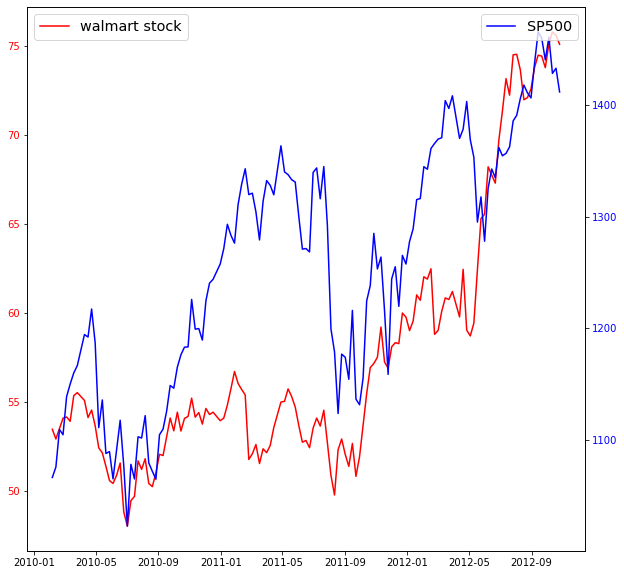

In [16]:
x = temp.time
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,temp['close_x'],color='red',label='walmart stock')
ax.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left',fontsize='x-large')
ax2 = ax.twinx()
ax2.plot(x,temp['close_y'],color='blue',label='SP500')
ax2.tick_params(axis='y', labelcolor='blue')

plt.legend(loc='upper right', fontsize='x-large')

In [17]:
pct_change = temp.set_index('time')
pct_change = pct_change.pct_change()
pct_change = pd.DataFrame([pct_change[i]*100 for i in pct_change.columns]).T

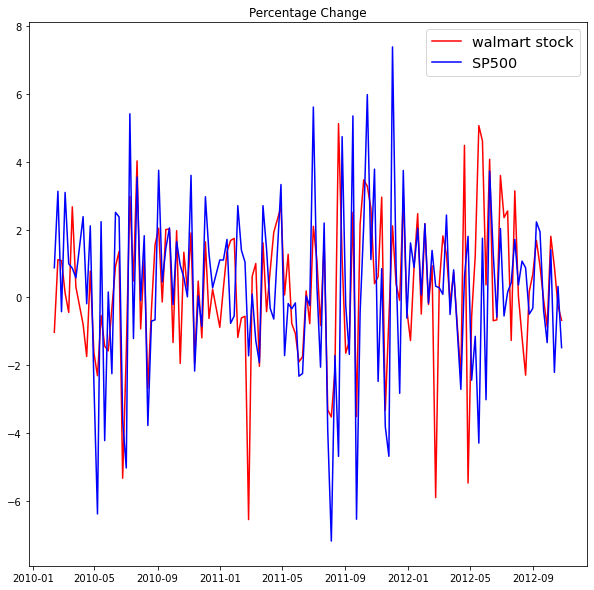

In [18]:
x = pct_change.index
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Percentage Change")
ax.plot(x,pct_change['close_x'],color='red',label='walmart stock')
ax.plot(x,pct_change['close_y'],color='blue',label='SP500')
plt.legend(loc='upper right', fontsize='x-large')

### 1.4.2 Visualization of Walmart Stock Prices and Weekly Sales

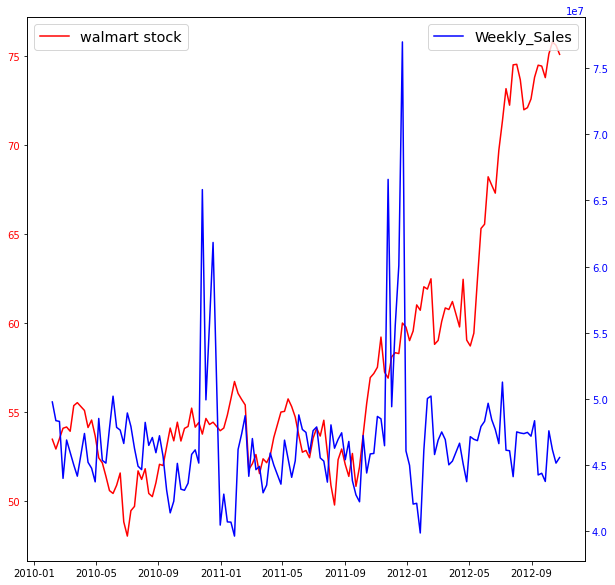

In [19]:
x = temp.time
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,temp['close_x'],color='red',label='walmart stock')
ax.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left',fontsize='x-large')
ax2 = ax.twinx()
ax2.plot(x,temp['Weekly_Sales'],color='blue',label='Weekly_Sales')
ax2.tick_params(axis='y', labelcolor='blue')

plt.legend(loc='upper right', fontsize='x-large')

#### From the above graph, we can also see that weekly sales tend to go up when stock prices are going up and vice versa. More importantly, we can see that weekly prices will get a spike when it's holiday season, with the 2 biggest spikes happening around Christmas

#### From the graph of the weekly sales, we can also see that there might be seasonality in the weekly sales.

In [20]:
ws = pd.DataFrame(df.groupby('Date')['Weekly_Sales'].agg('sum'))
cpi = pd.DataFrame(df.groupby('Date')['CPI'].agg('mean'))
oil = pd.DataFrame(df.groupby('Date')['Fuel_Price'].agg('mean'))

In [21]:
ws_cpi = pd.merge(ws, cpi, on='Date')
ws_cpi_oil = pd.merge(ws_cpi, oil, on='Date')

In [22]:
ws_cpi_oil

,Weekly_Sales,CPI,Fuel_Price
Date,,,
2010-02-05,49750740.50,167.730885,2.717844
2010-02-12,48336677.63,167.825608,2.694022
2010-02-19,48276993.78,167.871686,2.672067
2010-02-26,43968571.13,167.909657,2.683933
2010-03-05,46871470.30,167.947628,2.731200
...,...,...,...
2012-09-28,43734899.40,176.373588,3.854578
2012-10-05,47566639.31,176.505052,3.845222
2012-10-12,46128514.25,176.636515,3.896733


### 1.4.3 Visualization of Weekly Sales and CPI

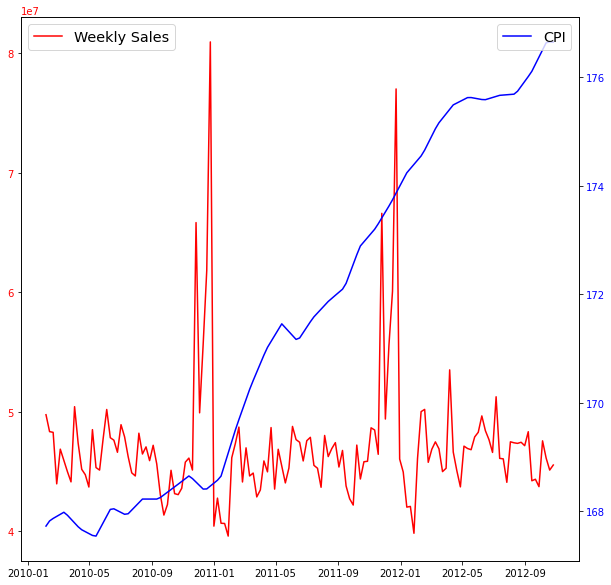

In [23]:
x = ws_cpi_oil.index
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,ws_cpi_oil['Weekly_Sales'],color='red',label='Weekly Sales')
ax.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left',fontsize='x-large')

ax2 = ax.twinx()
ax2.plot(x,ws_cpi_oil['CPI'],color='blue',label='CPI')
ax2.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper right', fontsize='x-large')

### 1.4.4 Visualization of Weekly Sales and Oil

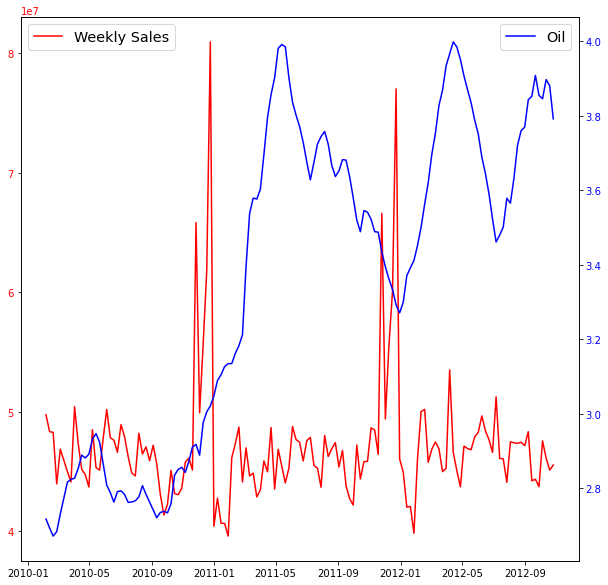

In [24]:
x = ws_cpi_oil.index
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,ws_cpi_oil['Weekly_Sales'],color='red',label='Weekly Sales')
ax.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper left',fontsize='x-large')

ax2 = ax.twinx()
ax2.plot(x,ws_cpi_oil['Fuel_Price'],color='blue',label='Oil')
ax2.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper right', fontsize='x-large')

#### It seems like oil and weekly sales correlation might be a little different compared with the other few plots we have generated.

## 1.5 Distributions of Various Variables

In [25]:
a = df.columns.drop('Date')

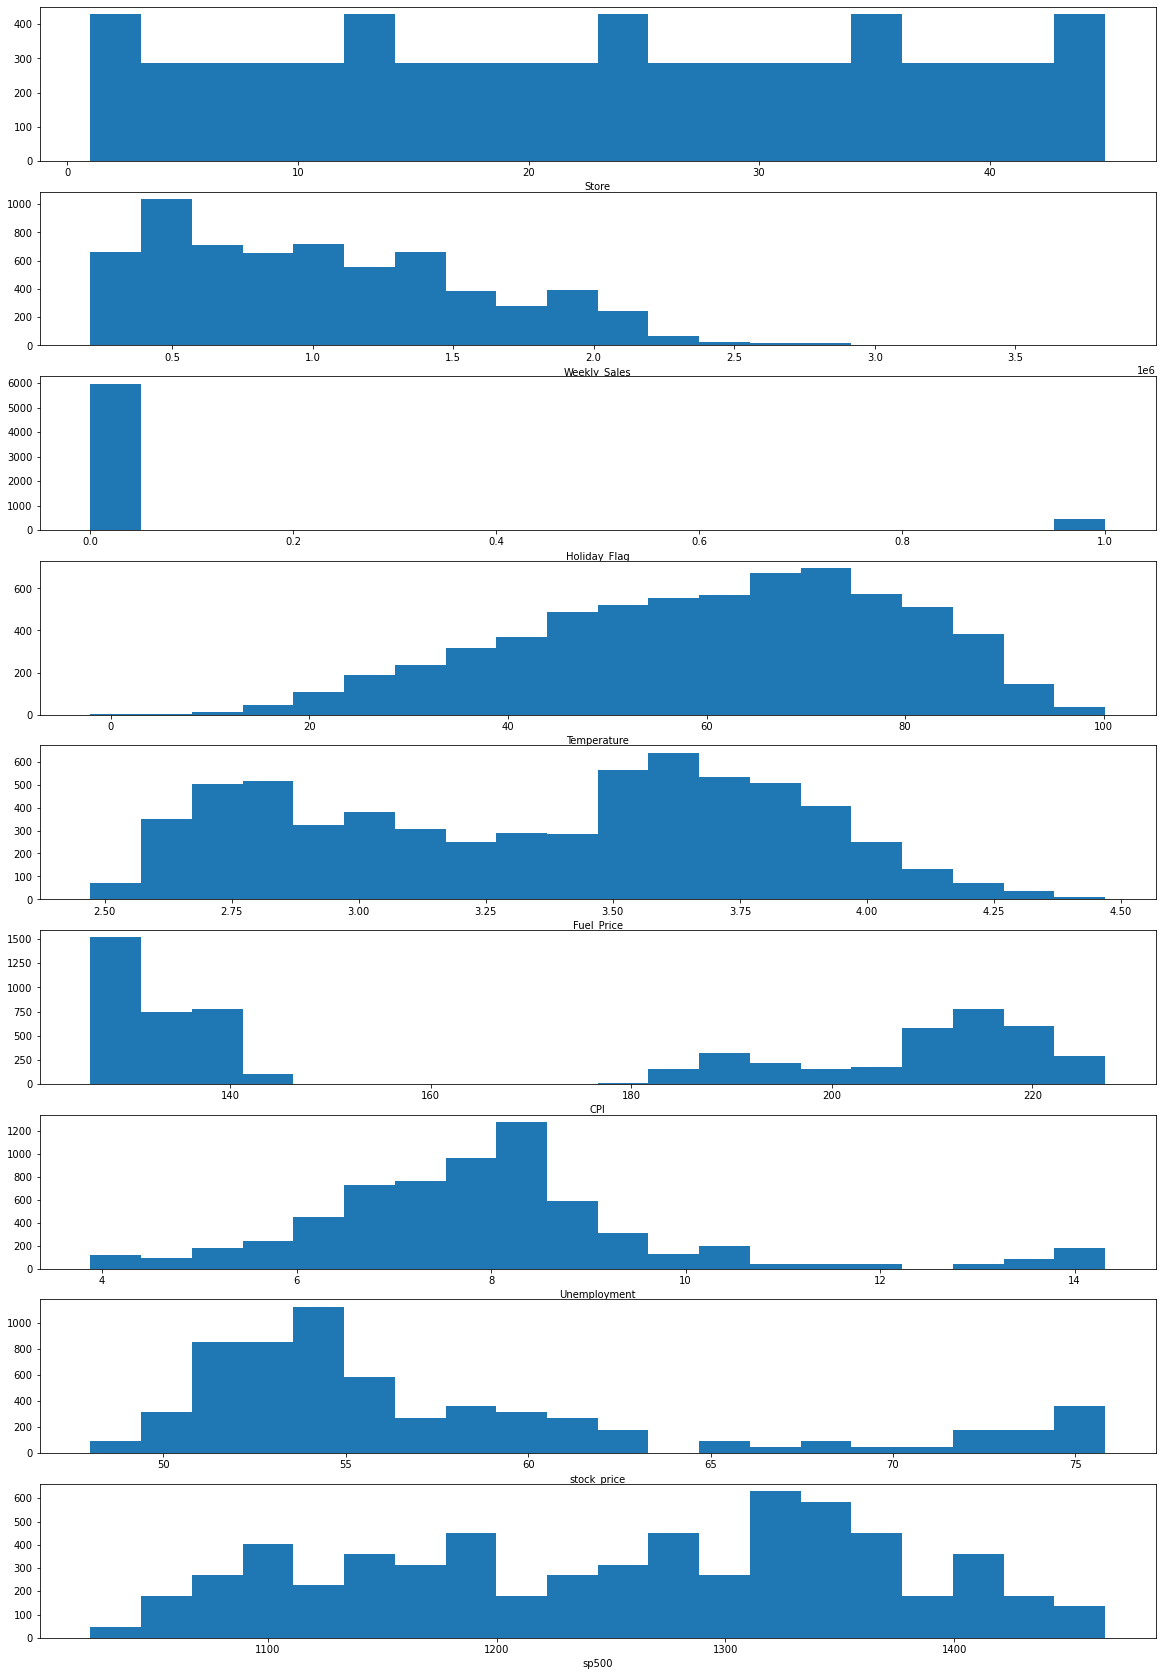

In [26]:
fig, ax = plt.subplots(len(a), figsize=(20,30))
k=0

columns = a
for i in range(len(a)):
    ax[i].hist(df[a[i]], bins=20)
    ax[i].set_xlabel(a[i])
        

## 1.6 Autocorrelation of Weekly Sales and ADFuller

In [27]:
import statsmodels.api as sm

In [28]:
ac = df['Weekly_Sales'].pct_change().autocorr()

In [29]:
from statsmodels.tsa.stattools import adfuller
pt_change = df['Weekly_Sales'].pct_change().dropna()

In [30]:
#Result of adfuller test to test whether the weekly sales is a random walk or not
result = adfuller(pt_change)

In [31]:
print("The P-value of the test is " + str(result[1])+', which means that the weekly sales is indeed a RANDOM WALK')

The P-value of the test is 2.594373999212526e-27, which means that the weekly sales is indeed a RANDOM WALK


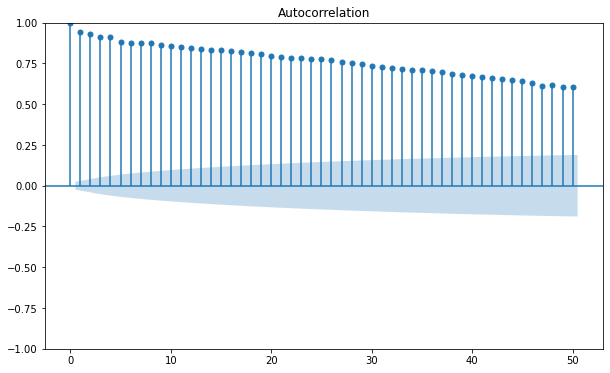

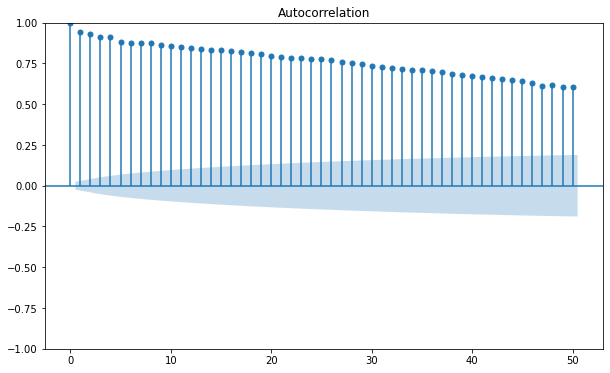

In [32]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(df['Weekly_Sales'], lags=50)

## 1.7 Correlation Between Numerical Variables and Weekly Sales

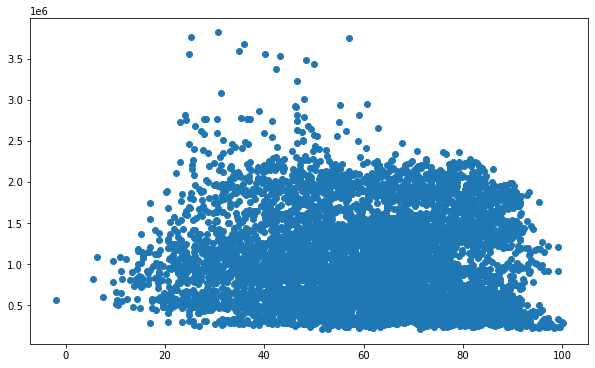

In [33]:
_ = plt.plot()
_ = plt.scatter(df['Temperature'], df['Weekly_Sales'])

In [34]:
print("It seems like the temperature and weekly sales don't have a strong correlation")

It seems like the temperature and weekly sales don't have a strong correlation


In [35]:
df_monthly = df[["Date", "Weekly_Sales"]]
df_monthly['Month'] = pd.to_datetime(df_monthly['Date'].dt.strftime('%Y-%m'))

/var/folders/4m/qh070ww90rqgmcw604kkdt8r0000gn/T/ipykernel_62381/371743915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly['Month'] = pd.to_datetime(df_monthly['Date'].dt.strftime('%Y-%m'))


In [36]:
df_monthly = df_monthly.groupby('Month').agg('sum')

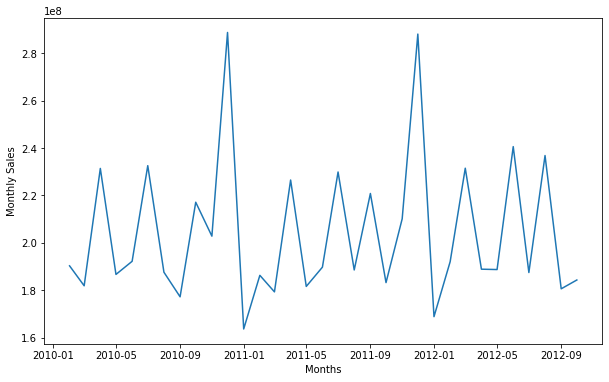

In [37]:
_ = plt.plot(figsize=(400,400))
_ = plt.plot(df_monthly)
_ = plt.xlabel('Months')
_ = plt.ylabel('Monthly Sales')

## 1.8 Decomposition of Weekly Sales (Time Series)

In [38]:
y = temp
y.set_index('time', inplace=True)

In [39]:
y.sort_index(inplace=True)

In [40]:
y.shape

(139, 3)

In [52]:
y

,Weekly_Sales,close_x,close_y
time,,,
2010-02-05,49750740.50,53.45000,1066.19
2010-02-12,48336677.63,52.89999,1075.51
2010-02-19,48276993.78,53.49001,1109.17
2010-02-26,43968571.13,54.07001,1104.49
2010-03-05,46871470.30,54.14000,1138.69
...,...,...,...
2012-09-28,43734899.40,73.80000,1440.67
2012-10-05,47566639.31,75.13000,1460.93
2012-10-12,46128514.25,75.81000,1428.59


In [53]:
y = y['Weekly_Sales']

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

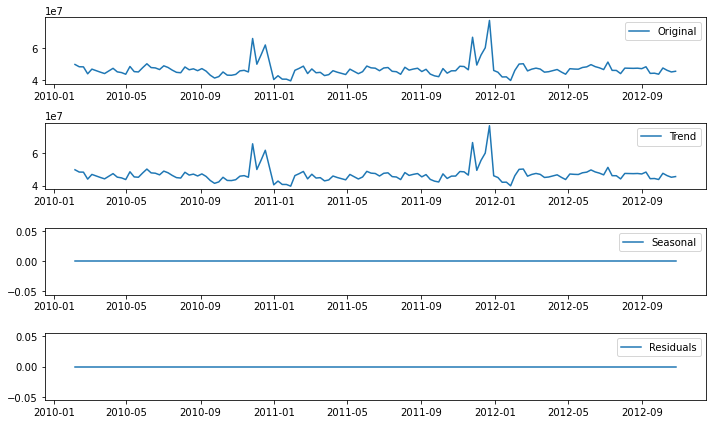

In [55]:
# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition = seasonal_decompose(x=y,model='additive',extrapolate_trend='freq',period=1)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

#### From the above graph, we can see that therre is no huge seasonal or residual trend for our time series data.

#### From the autocorrelation graphs, we can tell that the weekly sales have a high autocorr with down to 50 lags.

In [56]:
#What else can I do for time series EDA
#What conclusion can I get from the autocorrelation graphs?

In [58]:
#Generate a dataset with all the variales (Some with mean and others with sum)
ano_temp = df.groupby('Date')[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].agg('mean')
ano_temp['time'] = ano_temp.index
temp['time'] = temp.index

In [59]:
temp = temp.rename(columns={'close_x':'Walmart','close_y':'sp500'})

In [60]:
merged = pd.merge(temp, ano_temp,how='left',left_index=True, right_index=True)

In [61]:
merged = merged.drop(['time_x', 'time_y'], axis=1)

In [62]:
merged.head()

,Weekly_Sales,Walmart,sp500,Temperature,Fuel_Price,CPI,Unemployment
time,,,,,,,
2010-02-05,49750740.50,53.45000,1066.19,34.037333,2.717844,167.730885,8.619311
2010-02-12,48336677.63,52.89999,1075.51,34.151333,2.694022,167.825608,8.619311
2010-02-19,48276993.78,53.49001,1109.17,37.719778,2.672067,167.871686,8.619311
2010-02-26,43968571.13,54.07001,1104.49,39.243556,2.683933,167.909657,8.619311
2010-03-05,46871470.30,54.14000,1138.69,42.917333,2.731200,167.947628,8.619311


<AxesSubplot:>

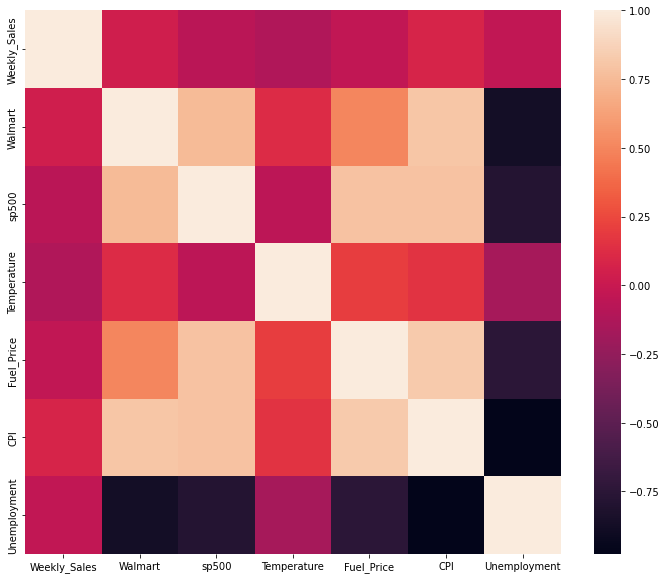

In [63]:
plt.subplots(figsize=(12,10))
sns.heatmap(merged.corr())

In [64]:
print("The correlation heatmap tells us that Weekly_Sales is not that strongly correlated to any of those variables")

The correlation heatmap tells us that Weekly_Sales is not that strongly correlated to any of those variables


In [65]:
pct_c = merged.pct_change().dropna()

<AxesSubplot:>

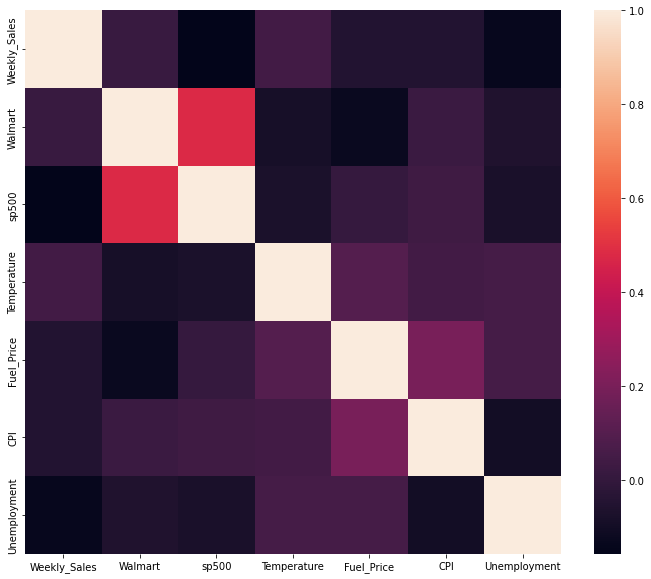

In [66]:
plt.subplots(figsize=(12,10))
sns.heatmap(pct_c.corr())

In [67]:
columns = [i for i in pct_c.columns if i not in 'Weekly_Sales']

## 1.10 Percentage Change Visualizations and Comparisons

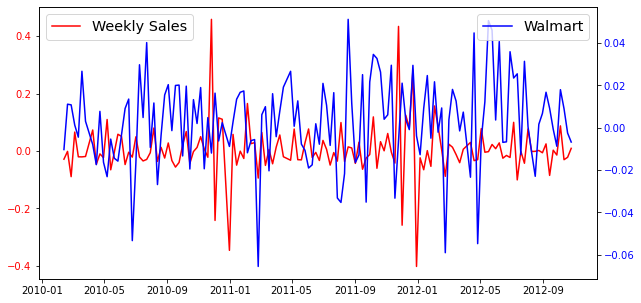

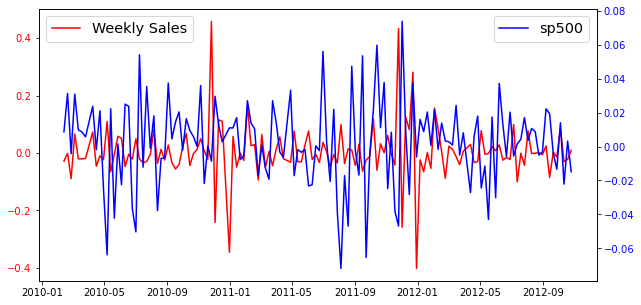

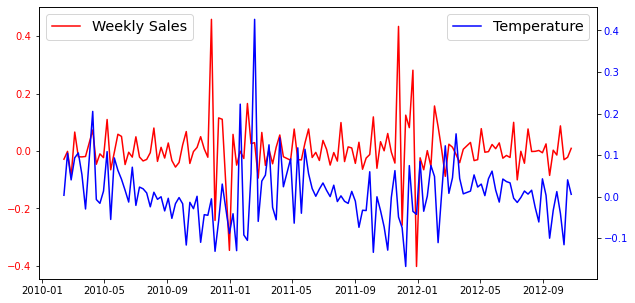

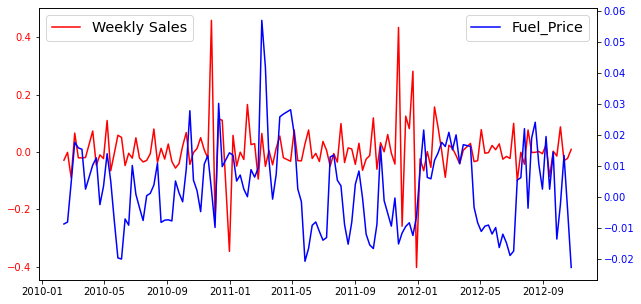

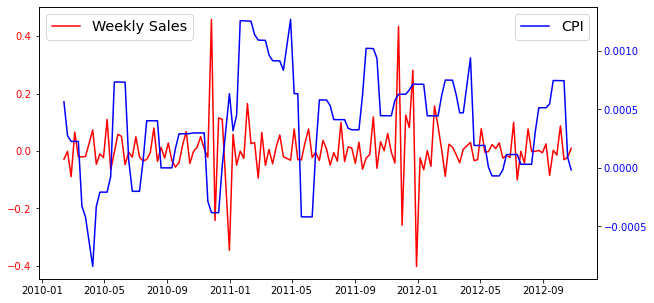

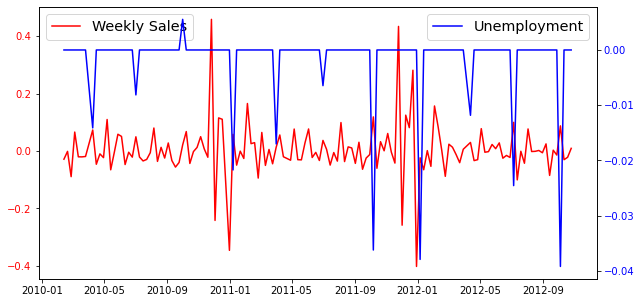

In [68]:
x = pct_c.index

for i in columns:
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x,pct_c['Weekly_Sales'],color='red',label='Weekly Sales')
    ax.tick_params(axis='y', labelcolor='red')
    plt.legend(loc='upper left',fontsize='x-large')

    ax2 = ax.twinx()
    ax2.plot(x,pct_c[i],color='blue',label=i)
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.legend(loc='upper right', fontsize='x-large')

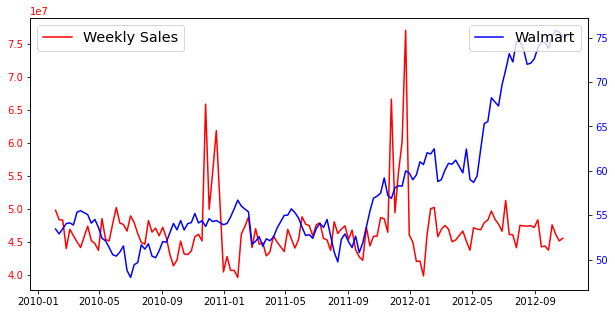

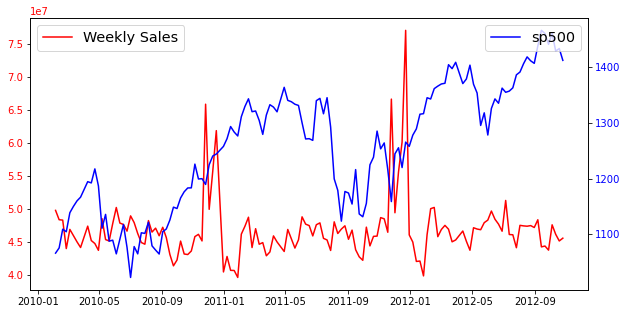

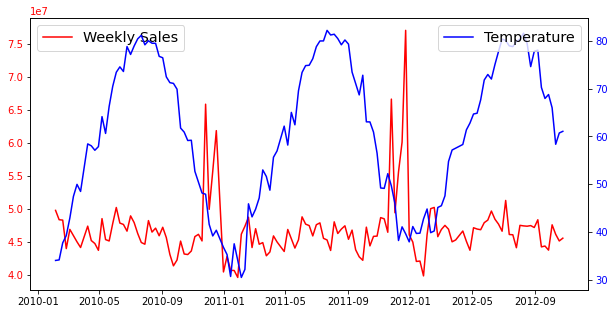

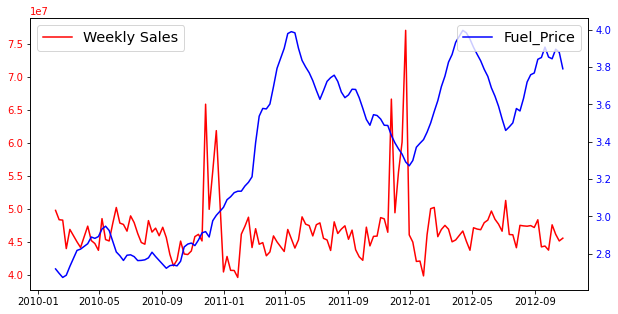

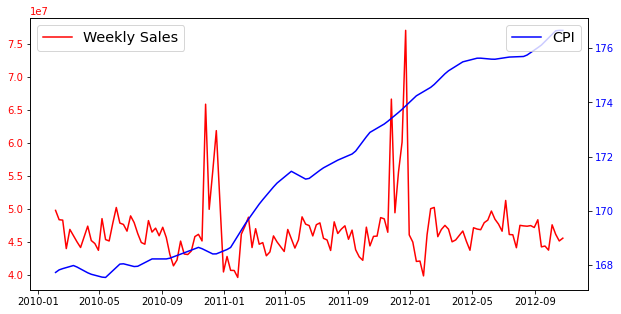

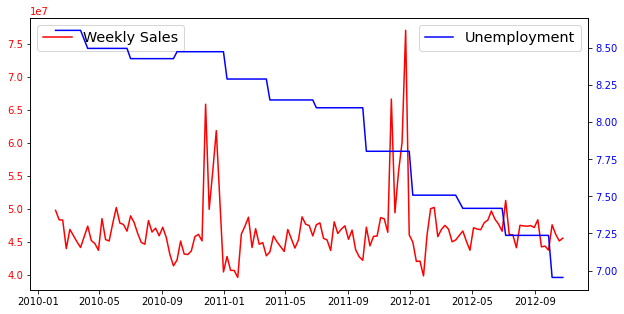

In [69]:
x = merged.index
ncolumns = [i for i in merged.columns if i not in 'Weekly_Sales']
for i in ncolumns:
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x,merged['Weekly_Sales'],color='red',label='Weekly Sales')
    ax.tick_params(axis='y', labelcolor='red')
    plt.legend(loc='upper left',fontsize='x-large')

    ax2 = ax.twinx()
    ax2.plot(x,merged[i],color='blue',label=i)
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.legend(loc='upper right', fontsize='x-large')

In [70]:
df_after_wrangling = df.to_csv(r'../Capstone_Project_3/df_wrangled_1.csv')

In [71]:
df_merged = merged.to_csv(r'../Capstone_Project_3/grouped.csv')